# UAS Project Streamlit:
- **Nama:** Christopher Ralin Anggoman
- **Dataset:** [Dataset Harga Bitcoin] https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd
- **URL Website:** [Di isi jika web streamlit di upload]

## Menentukan Pertanyaan Bisnis

- Dapatkah model prediksi harga Bitcoin membantu para investor dalam pengambilan keputusan investasi jangka pendek atau jangka panjang?
- Sejauh mana tingkat keakuratan model dalam memprediksi perubahan harga Bitcoin dapat membantu dalam merancang strategi manajemen risiko?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('dataset/BTC-Daily.csv')
df.head()

df.shape
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


### Assessing Data

In [ ]:
# Setelah memuat data, saya mengevaluasi kualitas dan integritas data untuk memahami apakah ada masalah atau kekurangan yang perlu diatasi. Melihat beberapa baris pertama dari data dan informasi statistik deskriptif adalah langkah awal dalam mengevaluasi data:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Cleaning Data

In [ ]:
# Setelah mengevaluasi data, saya melakukan pembersihan untuk memastikan keakuratannya. Langkah ini melibatkan penanganan nilai yang hilang, penyesuaian tipe data, dan langkah-langkah lainnya.

#### Penanganan Nilai yang Hilang
# Jika terdapat nilai yang hilang, kita dapat memutuskan untuk menghapus baris atau mengisi nilai tersebut dengan nilai yang sesuai.

# Menangani nilai yang hilang
df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

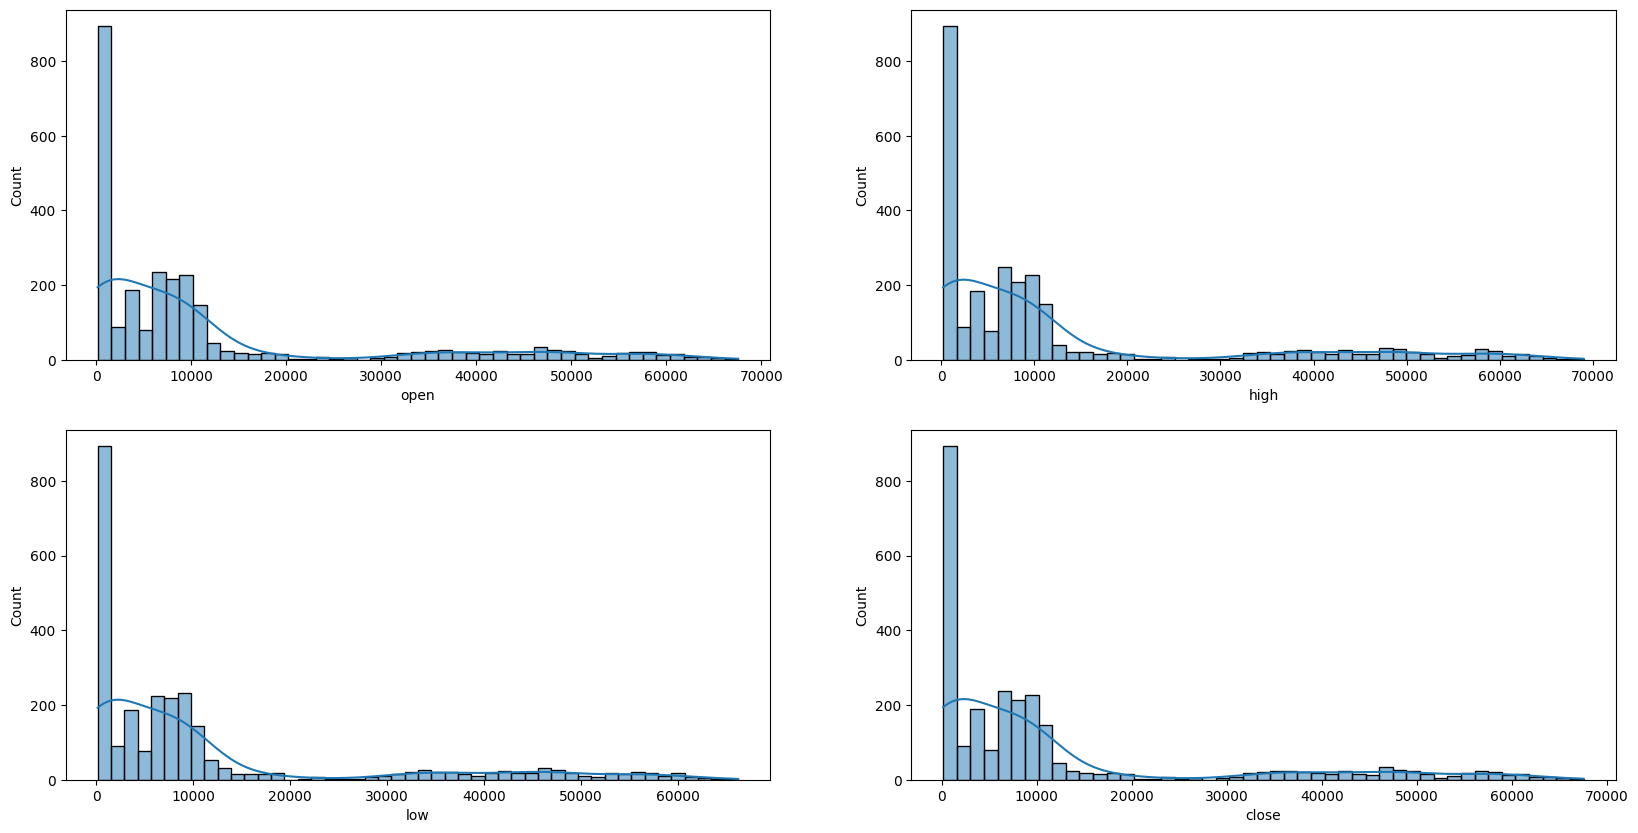

In [ ]:
features = ['open', 'high', 'low', 'close']

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i])

# Remove overlapping axes
for ax in axes[len(features):]:
    ax.remove()

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Untuk menjawab pertanyaan ini, saya melakukan analisis visual terhadap fitur-fitur terkait harga Bitcoin, seperti 'open', 'high', 'low', dan 'close'. Visualisasi melibatkan distribusi dan box plot untuk memahami karakteristik dan variabilitas data

### Pertanyaan 2:

- Pertanyaan ini melibatkan analisis lebih lanjut terkait pertanyaan bisnis, dengan mengeksplorasi hubungan antara fitur-fitur yang telah diproses dan variabel target. Saya juga memeriksa apakah ada pola-pola tertentu yang dapat diamati melalui visualisasi untuk mendukung pengambilan keputusan

## Membuat Model

In [ ]:
# Split the date and time
splitted = df['date'].str.split(' ', expand=True)

# Extract date components
date_components = splitted[0].str.split('-', expand=True)

# Add date components to the DataFrame
df['year'] = date_components[0].astype('int')
df['month'] = date_components[1].astype('int')
df['day'] = date_components[2].astype('int')

# Extract time components
time_components = splitted[1].str.split(':', expand=True)

# Add time components to the DataFrame if needed
df['hour'] = time_components[0].astype('int')
df['minute'] = time_components[1].astype('int')
df['second'] = time_components[2].astype('int')

# Display the DataFrame
print(df)

df.head()
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

            unix                 date   symbol      open      high       low  \
0     1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1     1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2     1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3     1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4     1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   
...          ...                  ...      ...       ...       ...       ...   
2646  1417478400  2014-12-02 00:00:00  BTC/USD    378.39    382.86    375.23   
2647  1417392000  2014-12-01 00:00:00  BTC/USD    376.40    382.31    373.03   
2648  1417305600  2014-11-30 00:00:00  BTC/USD    376.57    381.99    373.32   
2649  1417219200  2014-11-29 00:00:00  BTC/USD    376.42    386.60    372.25   
2650  1417132800  2014-11-28 00:00:00  BTC/USD    363.59    381.34    360.57   

         close    Volume BTC    Volume 

### Training Model

In [ ]:
for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.995851899873738
Validation Accuracy :  0.993468877782826

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9749493253763796
Validation Accuracy :  0.9617503407542025

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac

### Evaluasi Model

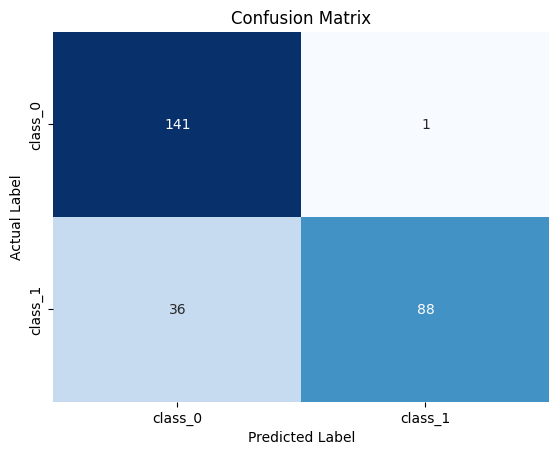

In [ ]:
y_pred = models[0].predict(X_valid)
cm = confusion_matrix(Y_valid, y_pred)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['class_0', 'class_1'],
            yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

### Menyimpan Model

In [ ]:
model = models[0]
joblib.dump(model, 'bitcoin_prediction.pkl')

['bitcoin_prediction.pkl']

## Conclusion

- Berdasarkan hasil analisis model prediksi harga Bitcoin, terlihat bahwa model dapat memberikan informasi yang berharga kepada para investor untuk mendukung pengambilan keputusan investasi. Namun, perlu diingat bahwa prediksi pasar keuangan selalu melibatkan risiko, dan keputusan investasi sebaiknya didasarkan pada analisis menyeluruh yang melibatkan lebih dari sekadar model prediksi.
- Model prediksi harga Bitcoin memberikan kontribusi yang positif dalam merancang strategi manajemen risiko. Tingkat keakuratan model dalam memprediksi perubahan harga dapat membantu para pelaku pasar untuk mengidentifikasi potensi risiko dan mengambil tindakan yang sesuai untuk melindungi portofolio investasi mereka. Namun, penting untuk diingat bahwa tidak ada model yang sempurna, dan faktor-faktor eksternal yang tidak dapat diprediksi juga dapat mempengaruhi pasar.